In [1]:
#preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
#importing data 
df = pd.read_csv("C:/Online_Retail.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581578,23255,CHILDRENS CUTLERY CIRCUS PARADE,12,12/9/2011,4.15,12713,Germany
1,581578,84997D,CHILDRENS CUTLERY POLKADOT PINK,8,12/10/2011,4.15,12713,Germany
2,581578,84997B,CHILDRENS CUTLERY RETROSPOT RED,8,12/11/2011,4.15,12713,Germany
3,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,12/12/2011,4.15,12713,Germany
4,581578,22555,PLASTERS IN TIN STRONGMAN,12,12/13/2011,1.65,12713,Germany
...,...,...,...,...,...,...,...,...
129,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,4/16/2012,0.85,12680,France
130,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,4/17/2012,2.10,12680,France
131,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4/18/2012,4.15,12680,France
132,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4/19/2012,4.15,12680,France


In [4]:
#converting the InvoiceDate column to datetime datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
#choosing the columns to use for the project
df2 = df[['InvoiceDate','Quantity']]

In [6]:
df2.set_index("InvoiceDate", inplace=True)
df2

,Quantity
InvoiceDate,
2011-12-09,12
2011-12-10,8
2011-12-11,8
2011-12-12,8
2011-12-13,12
...,...
2012-04-16,12
2012-04-17,6
2012-04-18,4


In [12]:
#using hdbscan 
from hdbscan import HDBSCAN
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=40).fit(df2)

%timeit clusterer.outlier_scores_

254 ns ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [22]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.8)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]

In [23]:
print(outliers)

[ 15  16  17  18  37  39  58  60  75  90  91  92  93 108]


In [32]:
x= df['InvoiceDate']
y=df['Quantity']

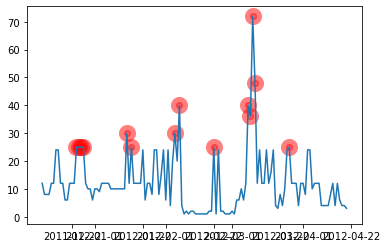

In [11]:
plt.scatter(x[outliers],y[outliers], s=50, linewidth=10, c='red', alpha=0.5)
plt.plot(df2["Quantity"])

<AxesSubplot:xlabel='InvoiceDate'>

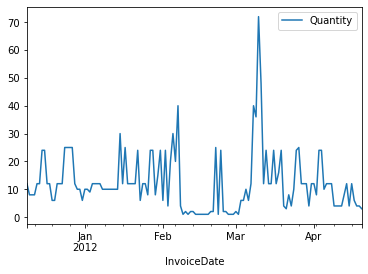

In [12]:
df2.plot()

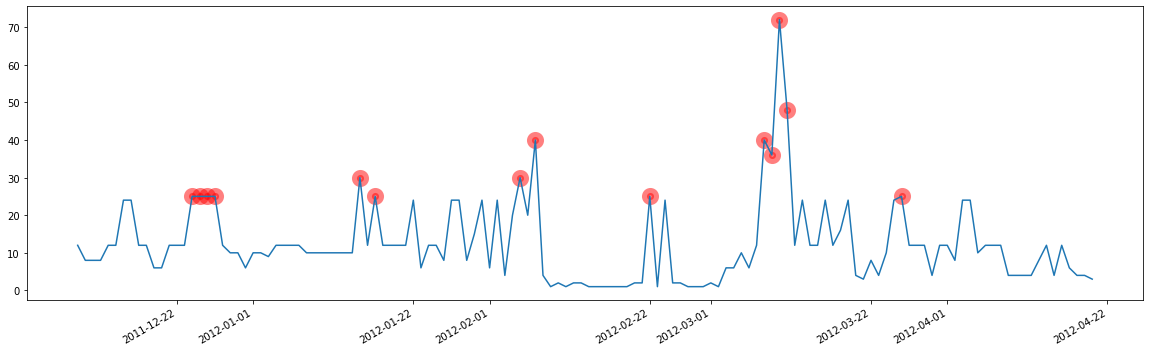

In [13]:
#Visualization
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(x[outliers],y[outliers], s=50, linewidth=10, c='red', alpha=0.5)
plt.plot(df2["Quantity"])
plt.gcf().autofmt_xdate()

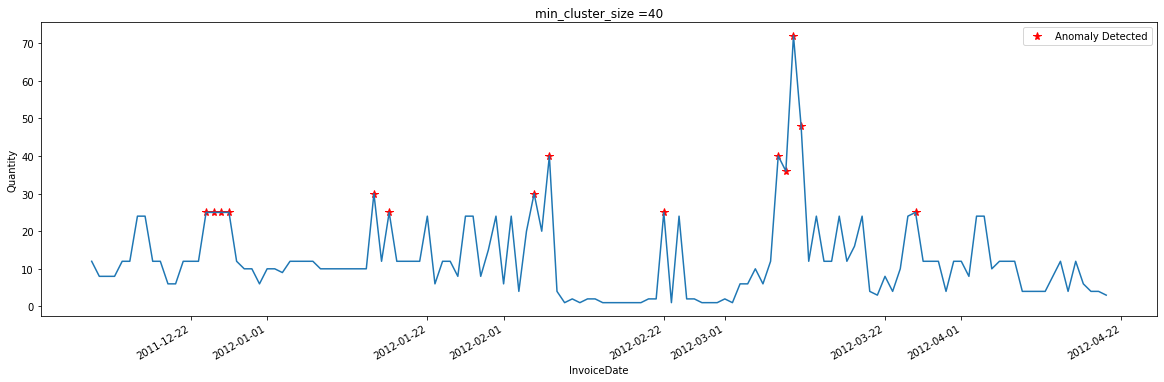

In [91]:
#Visualization
plt.rcParams["figure.figsize"] = (20,6)
plt.title(label = "min_cluster_size =40", fontsize=12)
plt.plot(x[outliers],y[outliers],'r*', markersize=8)
plt.legend(['Anomaly Detected'])
plt.plot(x,y)
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.gcf().autofmt_xdate()
